In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("cs109a_hw2.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2022**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [2]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- Plots should be legible and interpretable without having to refer to the code that generated them, including labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you think the plot *means*.
- The use of 'hard-coded' values to try and pass tests rather than solving problems programmatically will not receive credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output.
- Feel free to add additional code or markdown cells as needed.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells. This is how the notebook will be evaluated (note that this can take a few minutes).

In [3]:
# RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

<a id="contents"></a>

## Notebook Contents

- [**PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com**](#part1)
  - [Part 1 Overview](#part1intro)
  - [Question 1: Exploratory data analysis (EDA) [10 pts]](#part1questions)
  - [Question 2: k-Nearest Neighbors [25 pts]](#part2questions)
  - [Question 3: Simple linear regression [25 pts]](#part3questions)


- [**PART 2 [40 pts]: Analysis of Simulated ASEC Data**](#part2)
  - [Part 2 Overview](#part2intro)
  - [Question 4:   Investigating trends [25 pts]](#part4questions)
  - [Question 5:  Calculate the Gini coefficient [10 pts]](#part5questions)
  - [Question 6:  Critiquing the simulated data [5 pts]](#part6questions)


## About this homework

This assignment is the first in which we'll go through the process of loading a dataset, splitting it into train and test sets, performing some preprocessing, and finally fitting some models and evaluating our results.

We have two different datasets:
- [**PART 1**](#part1) car data from [cardekho.com](https://www.cardekho.com/)
- [**PART 2**](#part2) *simulated* income data created from the [Annual Social and Economic (ASEC) Supplement](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2021.html)

Part 1 explores two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method.

Part 2 is focused EDA and visualization.

<a id="part1"></a>
    
# PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com

[Return to contents](#contents)

<a id="part1intro"></a>

## Overview

[Return to contents](#contents)

According to its website, **CarDekho.com** is India's leading car search venture. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons, as well as videos and pictures of all car brands and models available in India. Each car has a **current selling price**, which is the price for buying a used car on this site, and an **MRP**, which is the retail price of the car. These two prices differ depending on factors such as brand, make year, mileage, condition, etc.  

### Dataset 

The dataset contains 601 used cars and is available as `data/car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a used car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of the car when it was new (in lakhs). 
- **Kms_Driven** - number of kilometers

**NOTE:** 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

### Objective

Using kNN and linear regression we will predict the `Current_Selling_Price` from the other features available in this dataset.

<a id="part1questions"></a>

## <div class='exercise'><b> Question 1: Exploratory data analysis (EDA) [10 pts]</b></div>

[Return to contents](#contents)

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.1</b></div>

Identify all variables in the dataset. Which ones are quantitative, and which ones are categorical? If you think any variables are categorical, briefly explain why.

_Points:_ 2

There are 4 variables in car_dekho_full.csv - Year, Current_Selling_Price (lakh), MRP (lakh) Kms_Driven. Current_Selling_Price (lakh), MRP (lakh) Kms_Drive are quantitative variables. Variable Year is categorical, as it shows a limited range of years corresponding to when a car was made. Despite there might be some sense of ordering, where older cars are priced lower (weak correlation), there are newer cars with worse quality than preceding year models. In other words, there might be varying qualitative differences between different years e.g. the differences between 2019 vs 2021 cars might not be the same as differences between 2018 vs 2019 cars.

In [4]:
df = pd.read_csv('data/car_dekho_full.csv')

In [5]:
df.head()

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


In [6]:
df.dtypes

Year                       int64
Current_Selling_Price    float64
MRP                      float64
Kms_Driven                 int64
dtype: object

<!-- END QUESTION -->

<div class='exercise'><b>Q1.2</b></div>

What are the means and standard deviations for `Current_Selling_Price` and `MRP`?

Store your results in `mean_csp`, `mean_mrp`, `std_csp`, and `std_mrp` to match the variable names used in the provided print function.

_Points:_ 2

In [7]:
# summary statistics
# can use for quick check on outliers
df.describe() 

,Year,Current_Selling_Price,MRP,Kms_Driven
count,601.000,601.000,601.000,601.000
mean,2013.887,4.393,6.912,33718.745
std,2.721,4.518,6.480,26846.657
min,2003.000,0.120,0.320,500.000
25%,2012.000,1.050,1.470,15000.000
50%,2015.000,3.600,6.050,30000.000
75%,2016.000,5.800,9.400,46500.000
max,2018.000,33.000,36.230,213000.000


In [8]:
mean_csp = df['Current_Selling_Price'].mean()
mean_mrp = df['MRP'].mean()
std_csp = df['Current_Selling_Price'].std()
std_mrp = df['MRP'].std()

In [9]:
# Be certain to name your variables mean_csp, mean_mrp, std_csp, std_mrp
# to match the variable names used in the provided print function
print(
    "\n"
    f"The mean Current Selling Price is {mean_csp:.4f} lakhs\n"
    f"The mean MRP is {mean_mrp:.4f} lakhs\n"
    f"The Standard Deviation of Current Selling Price is {std_csp:.4f}\n"
    f"The Standard Deviation of MRP is {std_mrp:.4f}"
)


The mean Current Selling Price is 4.3931 lakhs
The mean MRP is 6.9116 lakhs
The Standard Deviation of Current Selling Price is 4.5183
The Standard Deviation of MRP is 6.4801


In [10]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<div class='exercise'><b>Q1.3</b></div>

What is the range of kilometers that the cars have been driven? Store your answer in the variable `km_range`.

**Hint:** 'range' here refers the difference between the highest and lowest recorded kilometers driven.

_Points:_ 2

In [11]:
# your code here
km_range = df['Kms_Driven'].max() - df['Kms_Driven'].min()

In [12]:
# check your result
print(f"the range of kilometers is {km_range:,.2f}")

the range of kilometers is 212,500.00


In [13]:
grader.check("q1.3")

q1.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.4</b></div>

The goal in this section is to identify the best feature to use to predict our response, `Current_Selling_Price`. 

- Plot a scatter plot of each feature and our reponse and examine any relationships.
- Which is the predictor that seems to best predict `Current_Selling_Price`? Provide an interpretation of the plots that justifies your choice.

_Points:_ 4

From the pairplot and correlation matrix, it seems like MRP is the best predictor of Current_Selling_Price, as the scatter plots cluster along a diagonal line, supported by a correlation coefficient closest to 1. Higher retail car prices lead to higher Current_Selling_Prices.

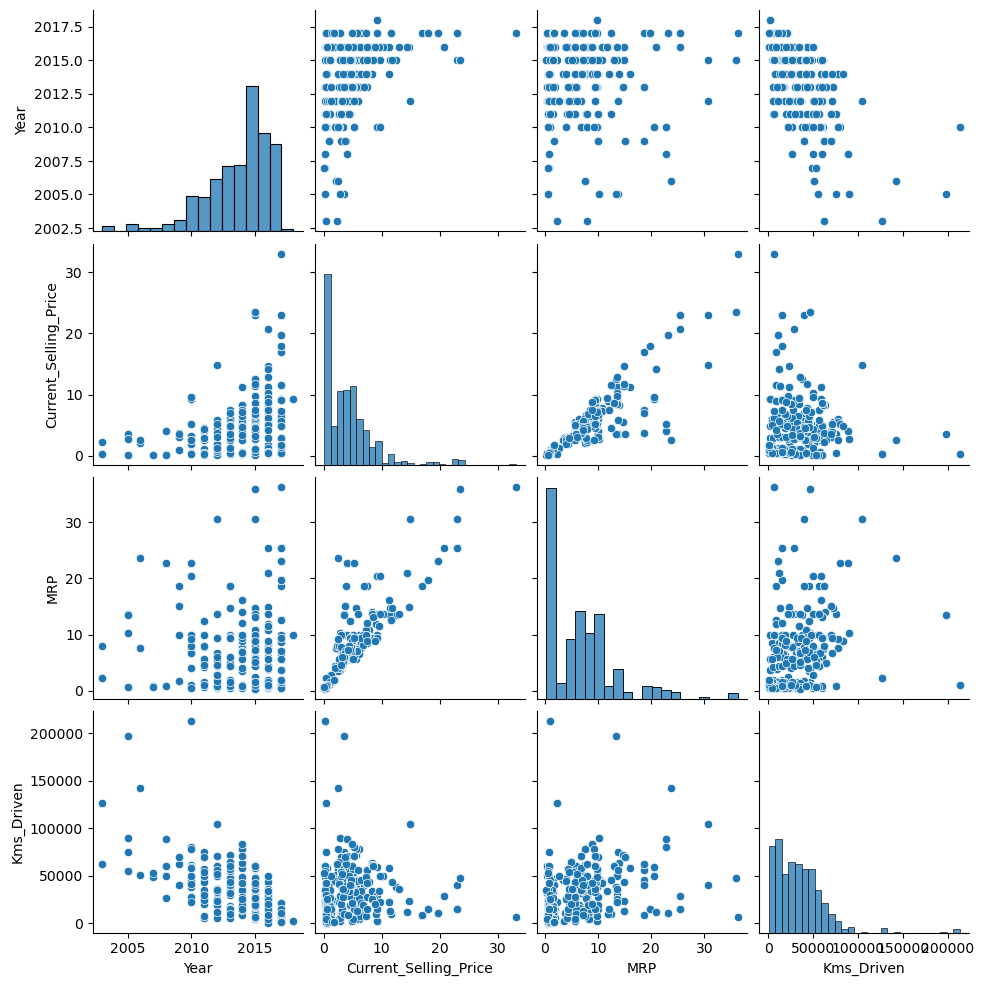

In [14]:
sns.pairplot(df)
plt.show()

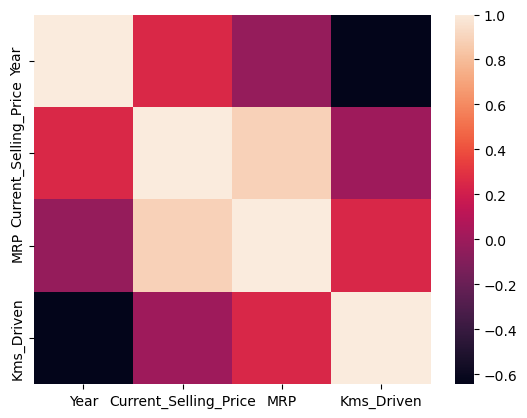

In [15]:
sns.heatmap(df.corr())
plt.show()

<!-- END QUESTION -->

<a id="part2questions"></a>

## <div class='exercise'><b> Question 2:   k-Nearest Neighbors [25 pts]</b></div>

[Return to contents](#contents)

We will begin our modeling with k-Nearest Neighbors (kNN) regression, using `sklearn` for both preprocessing and model fitting.

<div class='exercise'><b>Q2.1</b></div>

Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`. The resulting splits should be stored in the variables `X_train`, `X_test`, `y_train`, `y_test`.

_Points:_ 2

In [16]:
# x = df[['Year','MRP','Kms_Driven']]
x = df[['Year','MRP','Kms_Driven']]
y = df['Current_Selling_Price']

In [17]:
x.shape, y.shape

((601, 3), (601,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=109)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((450, 3), (151, 3), (450,), (151,))

In [20]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<div class='exercise'><b>Q2.2</b></div>

Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2.1</b></div>

For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor `MRP`. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 

_Points:_ 7

In [21]:
# initialize x_train and x_test, subsetting ['MRP'] data from X_train and X_test, respectively. y_train remains the same
x_train = pd.DataFrame(X_train['MRP'])
x_test = pd.DataFrame(X_test['MRP'])
x_train.head(3), x_test.head(3)

(       MRP
 433   8.50
 156  14.00
 501   3.95,
       MRP
 455  9.40
 240  4.43
 25   9.83)

In [22]:
#  helper function to record model metrics
def get_metrics(model, name) -> dict:
    d = {}
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    d['name'] = name
    d['train_mse'] = mean_squared_error(y_train, y_hat_train)
    d['test_mse'] = mean_squared_error(y_test, y_hat_test)
    d['r2_train'] = r2_score(y_train, y_hat_train)
    d['r2_test'] = r2_score(y_test, y_hat_test)
    return d

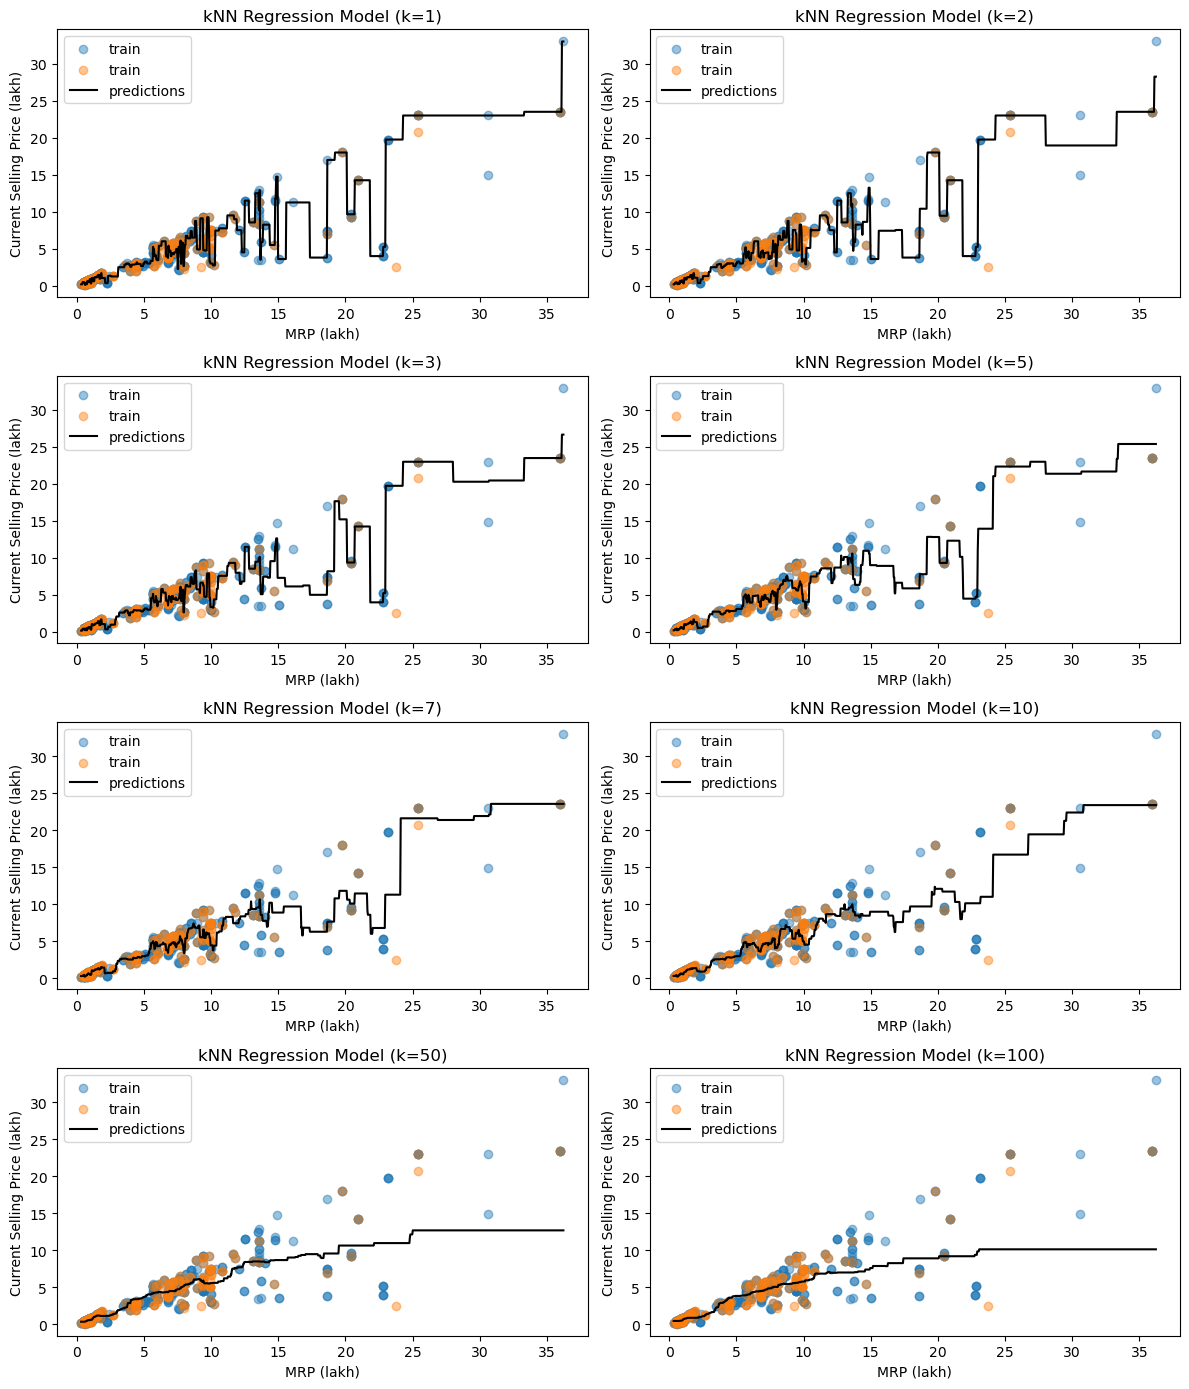

In [23]:
# Initialize subplot layout
fig, axs = plt.subplots(4,2, figsize=(12, 14))
fig.subplots_adjust(hspace = .5, wspace=.3)
axs = axs.ravel()

# setup ks and mse array
ks = [1,2,3,5,7,10,50,100]
results = []
train_mses = []
test_mses = []

# main loop to populate subplot with relevant information
for k, ax in zip(ks, axs):
    # get KNN model
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(x_train, y_train)
    
    # get model metrics
    knn_metrics = get_metrics(knn_model, f'kNN (k = {k})')
    
    # append lists
    results.append(knn_metrics)
    train_mses.append(knn_metrics['train_mse'])
    test_mses.append(knn_metrics['test_mse'])
    
    # get xlin and y_pred for plotting
    x_lin = np.linspace(x['MRP'].min(), x['MRP'].max(), 1000) # keep increasing linplot number until no more diaghona lines
    x_lin = pd.DataFrame(x_lin, columns=['MRP'])
    # print(x_lin.head(3))
    y_pred = knn_model.predict(x_lin)
    
    # plot Current_Selling_Price and the predictor MRP
    ax.scatter(x_train, y_train, alpha=0.45, label='train')
    ax.scatter(x_test, y_test, alpha=0.45, label='train')
    ax.plot(x_lin, y_pred, c='k', label='predictions');
    ax.set_xlabel('MRP (lakh)')
    ax.set_ylabel('Current Selling Price (lakh)')
    ax.set_title(f'kNN Regression Model (k={k})')
    ax.legend();

# pd.DataFrame(results)

# function to add padding - makes subplots axis placing prettier
plt.tight_layout()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2.2</b></div>

Plot the training and test $MSE$ values as a function of $k$ (1 plot in total).

_Points:_ 4

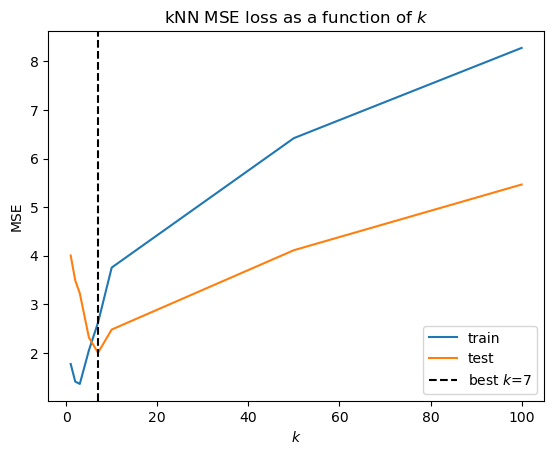

In [24]:
best_idx = np.argmin(test_mses)
best_k = ks[best_idx]

plt.plot(ks, train_mses, label='train')
plt.plot(ks, test_mses, label='test')
plt.axvline(best_k, c='k', ls='--', label=rf'best $k$={best_k}')
plt.xlabel(r'$k$')
plt.ylabel('MSE')
plt.title('kNN MSE loss as a function of $k$')
plt.legend();
plt.show()

<!-- END QUESTION -->

<div class='exercise'><b>Q2.2.3</b></div>

Find the best model based on the test $MSE$ values. Store the best $k$-value in `best_k` and the best test $MSE$ in `best_mse`.

_Points:_ 2

In [25]:
best_k = ks[np.argmin(test_mses)]
best_mse = np.min(test_mses)

In [26]:
print(
    f"The best k value is {best_k}. This corresponds to the "
    f"lowest test MSE of {best_mse:.3f}."
)

The best k value is 7. This corresponds to the lowest test MSE of 2.005.


In [27]:
grader.check("q2.2.3")

q2.2.3 results: All test cases passed!

<div class='exercise'><b>Q2.2.4</b></div>

Evaluate and report the $R^2$ of the best model. Save the $R^2$ of the best model in `best_r2`.

_Points:_ 2

In [28]:
# print results table from all kNN iterations
all_results = pd.DataFrame(results)
all_results

,name,train_mse,test_mse,r2_train,r2_test
0,kNN (k = 1),1.773,4.005,0.919,0.751
1,kNN (k = 2),1.410,3.492,0.935,0.783
2,kNN (k = 3),1.362,3.227,0.937,0.800
3,kNN (k = 5),2.056,2.317,0.906,0.856
4,kNN (k = 7),2.624,2.005,0.880,0.876
5,kNN (k = 10),3.757,2.481,0.827,0.846
6,kNN (k = 50),6.422,4.115,0.705,0.745
7,kNN (k = 100),8.278,5.467,0.620,0.661


In [29]:
# your code here
best_r2 = all_results['r2_test'].max()

In [30]:
print(
    f"The R-squared score evaluated on the test set for the best model "
    f"with k={best_k} is {best_r2:.4f}."
)

The R-squared score evaluated on the test set for the best model with k=7 is 0.8755.


In [31]:
grader.check("q2.2.4")

q2.2.4 results: All test cases passed!

<div class='exercise'><b>Q2.3</b></div>

In this section you will discuss your results by answering the following questions.  You should answer the questions directly in the provided markdown cells of your notebook.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.3.1</b></div>

How does the value of $k$ affect the fitted model?

_Points:_ 2

Lower K leads to usntable decision boundaries. Higher value of k's evaluate more neighbors. A substantial k leads to a smoother kNN regression model line, eventually leading to a straight line when k = n. Models with too high k values are prone to overfitting.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.3.2</b></div>

If $n$ is the number of observations in the training set, what can you say about a kNN regression model that uses $k = n$?  

_Points:_ 2

Using k = n would choose entire training dataset as nearest neighbors. There will be a straight line with no slope at the average of all datapoints.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.3.3</b></div>

Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.

_Points:_ 2

Yes, the trend is that training data's best-k and MSE is lower than testing, since the former was used for the model's training in the first place! A model would generally perform worse in testing data. Thus, we rely on the lowest MSE of the testing data to arrive at the best-k for the model, since it means that the chosen k generalizes better for data outside the training set. A note of caution: a k-value that is too high is prone to overfitting.

<!-- END QUESTION -->

<div class='exercise'><b>Q2.3.4</b></div>

If you were to change the `random_state` argument to `train_test_split` above and re-run the code, do you think would select the same model? If not, why?

_Points:_ 2

No. A different model/k-value might be selected, since there will be new datapoints considered as nearest neighbors. Worst case, a split that is random but biased - including outliers or clustered datapoints - could cause large variations in optimal MSE. 

<a id="part3questions"></a>

## <div class='exercise'><b>Question 3:  Simple linear regression [25 pts]</b></div>

[Return to contents](#contents)

<div class='exercise'><b>Q3.1</b></div>

We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables you used in the kNN model. You will also use the same 75% training and 25% testing split of the data, which was created using `random_state = 109`.

<div class='exercise'><b>Q3.1.1</b></div>

Fit a linear regression model. Name your model `linreg`.

_Points:_ 6

In [32]:
x_train.head(5), y_train.head(5)

(       MRP
 433   8.50
 156  14.00
 501   3.95
 356  13.09
 357  13.09,
 433    7.40
 156    8.25
 501    2.85
 356    8.55
 357    8.55
 Name: Current_Selling_Price, dtype: float64)

In [33]:
# Instantiate a LinearRegression class object and fit with train data
linreg = LinearRegression().fit(x_train, y_train)

In [34]:
grader.check("q3.1.1")

q3.1.1 results: All test cases passed!

<div class='exercise'><b>Q3.1.2</b></div>

Report the slope and intercept values for the fitted linear model. Name your variables `slope` and `intercept`.

_Points:_ 4

In [35]:
# your code here
slope = float(linreg.coef_)
intercept = float(linreg.intercept_)

In [36]:
print(
    f"Intercept of the fitted linear model\t\t{slope:.4f}\n"
    f"Slope of the fitted linear model\t{intercept:.4f}"
)

Intercept of the fitted linear model		0.6157
Slope of the fitted linear model	0.1124


In [37]:
grader.check("q3.1.2")

q3.1.2 results: All test cases passed!

<div class='exercise'><b>Q3.1.3</b></div>

Report the $MSE$ for the training and test sets and the $R^2$ for the test set. Name your variables `lin_train_mse`, `lin_test_mse`, and `lin_test_r2`.

_Points:_ 4

In [38]:
y_pred_train = linreg.predict(x_train)
y_pred_test = linreg.predict(x_test)

#Compute the MSE of the model
lin_train_mse = mean_squared_error(y_train, y_pred_train)
lin_test_mse = mean_squared_error(y_test, y_pred_test)
#Compute the R-squared of the model
lin_test_r2 = r2_score(y_test, y_pred_test)

In [39]:
print("Linear regression model results:\n")
print(
    "\tTrain MSE\t{:.4f}\n"
    "\tTest MSE\t{:.4f}\n".format(
        lin_train_mse,
        lin_test_mse,
    )
)

print(f"\tTest R-squared\t{lin_test_r2:.4f}")

Linear regression model results:

	Train MSE	4.7133
	Test MSE	3.1362

	Test R-squared	0.8053


In [40]:
grader.check("q3.1.3")

q3.1.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.1.4</b></div>

Plot the **residuals**, $e = y - \hat{y}$, of the model on the **training** set as a function of the **response** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.

_Points:_ 5

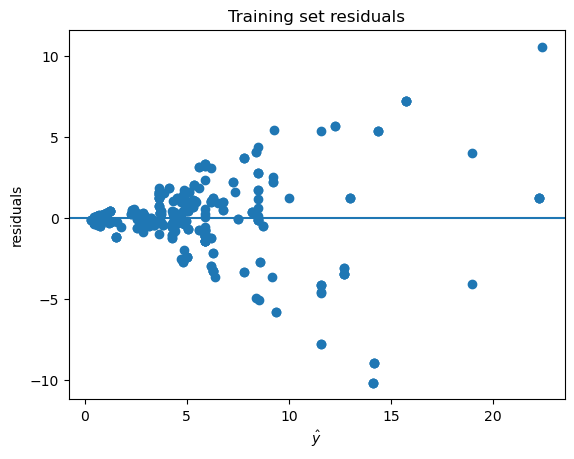

In [41]:
resids = y_train - y_pred_train
plt.scatter(y_pred_train, resids)
plt.axhline(0)
plt.ylabel('residuals')
plt.xlabel('$\hat{y}$')
plt.title('Training set residuals')
plt.show()

<!-- END QUESTION -->

<div class='exercise'><b>Q3.2</b></div>
Answer the following questions about your results:

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.1</b></div>

How does the test $MSE$ score compare with the best test $MSE$ value obtained with kNN regression? 

_Points:_ 2

In [42]:
print("KNN model results:\n")
print(
    f"\tThe best k value is {best_k}. This corresponds to the "
    f"lowest test MSE of {best_mse:.3f}."
)
print(
    f"\tThe best R-squared score evaluated on k={best_k} is {best_r2:.4f}."
)

KNN model results:

	The best k value is 7. This corresponds to the lowest test MSE of 2.005.
	The best R-squared score evaluated on k=7 is 0.8755.


In [43]:
print("Linear regression model results:\n")
print(
    "\tTest MSE\t{:.4f}".format(
        lin_test_mse,
    )
)

print(f"\tTest R-squared\t{lin_test_r2:.4f}")

Linear regression model results:

	Test MSE	3.1362
	Test R-squared	0.8053


The best test MSE of kNN regression is better than linear regression. THis suggest that the KNN model generalizes the testing dataset better than the linear model. Even the kNN's r-squared is better than linear regression

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.2</b></div>

What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

_Points:_ 2

The positive slope indicates a positive relationship between the predictor and response, where if everything else is held constant, a 1 unit increase in the predictor leads to a 1*(slope=0.1124)=0.1124 unit increase in response.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.3</b></div>

Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.

_Points:_ 2

From left to right, it seems like the datapoints cluster close together, and eventually 'spread' out towards the end of the x-axis. This might suggest that error variances are not equal. In other words, the dataset is heteroscedastic, thus invalidating the assumption of linearity.

<!-- END QUESTION -->

<a id="part2"></a>
    
# PART 2 [40 pts]: Analysis of 2021 US Annual Social and Economic (ASEC) Supplement

[Return to contents](#contents)

<a id="part2intro"></a>

## Overview

[Return to contents](#contents)

In this part we analyze *simulated* income data from the publically available 2021 US Annual Social and Economic (ASEC) Supplement (https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2021.html), provided by the US Census Bureau. The Current Population Survey (CPS) has been conducted monthly for over 50 years. Currently, about 54,000 households are interviewed monthly, scientifically selected on the basis of area of residence to represent the nation as a whole, individual states, and other specified areas. 

### Dataset

The simulated data can be found in `data/census_data.csv`.

The number of features have been greatly reduced from the original dataset. You can see the description of the original dataset in the [ASEC data dictionary](https://www2.census.gov/programs-surveys/cps/datasets/2021/march/asec2021_ddl_pub_full.pdf).

In addition to subsetting the features, other preprocessing steps have been taken. For example, some categorical variables have had their number of unique values reduced. 

We refer to the data as *simulated* because sampling was used to turn what was originally an ordinal response variable (42 income brackets) into something more continous.

Considering this, the results of your analysis should be viewed skeptically. You can view the the preprocessing steps taken to create the simplified, simulated data in `data/preprocessing.ipynb`.

**NOTE:** Variables have been renamed for easier interpretation. You can find the original variable names in the preprocessing notebook. It will be these original variable names that appear in the data dictionary linked above.

### Features
- **age** - Age of person 
- **hourly_pay** - Hourly salary of person (-1 if person is not payed by the hour)
- **hours_per_week** - Number of hours usually worked per week
- **weeks_worked** - Number of weeks worked per year

- **sex** - {'Female': 0,'Male': 1} 
- **marital_status** - {'married':0,'widowed':1,'Divorced':2, 'Separated':3,'Never married':4}
- **military_service** - {'has not served in the US armed forces':0,'has served in the US armed forces':1}
- **student_status** - {'Not currently studying':0,'Enrolled full-time':1, 'Enrolled part-time':1}
- **education** - {'Not finished high school': 0, 'High school': 1, 'Associate degree': 2, 'Bachelor\'s': 3, ,'Master\'s': 4,'Professional school degree': 5', Doctorate': 6}

- **race** - {'White': 0, 'Black': 1, 'American Indian, Alaskan Native only (AI)': 2, 'Asian': 3, ,'Hawaiian, Pacific Islander (HP)': 4,'White-Black': 5', 'White-AI': 6, 'White-Asian': 7, 'White-HP': 8, 'Black-AI': 9, 'Black-Asian': 10, 'Black-HP': 11, 'AI-Asian': 12, 'AI-HP': 13, 'Asian-HP': 14, 'other race combinations': 15}

- **industry** - Industry that the person is working in {'Other': 0, 'Agriculture, forestry, fishing, hunting': 1, 'Mining': 2, 'Construction': 3, ,'Manufacturing': 4,'Wholesale and retail trade': 5','Transportation and utilities': 6, 'Information': 7, 'Financial activities': 8, 'Professional and business services': 9, 'Education and health services': 10, 'Leisure and hospitality': 11, 'Other services': 12, 'Public administration': 13, 'Armed Forces': 14}

- **occupation** - Occupation of person {'Other': 0, 'Management, business, and financial occ.': 1, 'Professional and related occ.': 2, 'Service occ.': 3, ,'Sales and related occ.': 4,'Office and administrative support occ.': 5','Farming, fishing and forestry': 6, 'Construction and extraction occ.': 7, 'Installation, maintenance and repair occ.': 8, 'Production occ.': 9, 'Transportation and material moving occ.': 10, 'Armed Forces': 11}


- **income** - Annual income in dollars

In [44]:
df = pd.read_csv('data/census_data.csv')
df.head()
df.shape

(121845, 16)

<a id="part4questions"></a>

## <div class='exercise'><b>Question 4: Investigating trends [25 pts]</b></div>

[Return to contents](#contents)

Below we'll answer questions about potential trends in the data with the help of plots and simple statistics.

In [45]:
df.describe()

,Unnamed: 0,age,weeks_worked,hours_per_week,hourly_pay,student_status,education,marital_status,sex,military_service,race,industry,occupation,is_paid_by_hour,person_record,income
count,121845.000,121845.000,121845.000,121845.000,121845.000,121845.000,121845.000,121845.000,121845.000,121845.000,121845.000,121845.000,121845.000,121845.000,121845.000,121845.000
mean,81533.656,47.909,29.714,25.570,99.266,0.086,1.857,1.423,0.478,0.068,0.526,4.992,2.520,0.196,2.005,41845.997
std,47394.962,17.939,23.975,20.536,501.666,0.326,1.366,1.739,0.500,0.252,1.359,4.524,2.945,0.528,0.071,35861.252
min,0.000,18.000,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,1.090
25%,40357.000,33.000,0.000,0.000,-1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,12634.060
50%,81270.000,47.000,44.000,38.000,-1.000,0.000,1.000,0.000,0.000,0.000,0.000,5.000,2.000,0.000,2.000,31969.480
75%,122689.000,62.000,52.000,40.000,0.000,0.000,3.000,4.000,1.000,0.000,0.000,10.000,4.000,0.000,2.000,62422.010
max,163542.000,85.000,52.000,99.000,9900.000,2.000,6.000,4.000,1.000,1.000,15.000,14.000,11.000,2.000,3.000,212965.037


In [46]:
df.dtypes

Unnamed: 0            int64
age                   int64
weeks_worked          int64
hours_per_week        int64
hourly_pay            int64
student_status        int64
education             int64
marital_status        int64
sex                   int64
military_service      int64
race                  int64
industry              int64
occupation            int64
is_paid_by_hour       int64
person_record         int64
income              float64
dtype: object

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.1</b></div>

Is there a disparity in income of participants by gender? Consider using a log scale or another technique when plotting to communicate findings more clearly.

_Points:_ 3

Yes, there is a disparity of income by gender, where females have less mean and median icnome as shown by the describe() output below. However, there are more outliers for female income than their male counterparts; though it could also be due to the fact that there are more females than males in the census data.

In [47]:
male_income = df['income'][(df['sex'] == 1)]
female_income = df['income'][(df['sex'] == 0)]
male_income.shape, female_income.shape

((58267,), (63578,))

In [48]:
pd.DataFrame(male_income.describe())

,income
count,58267.000
mean,49891.470
std,37647.703
min,1.090
25%,19079.665
50%,41496.540
75%,76825.995
max,203847.163


In [49]:
pd.DataFrame(female_income.describe())

,income
count,63578.000
mean,34472.605
std,32434.679
min,1.540
25%,9206.810
50%,25047.660
75%,50950.482
max,212965.037


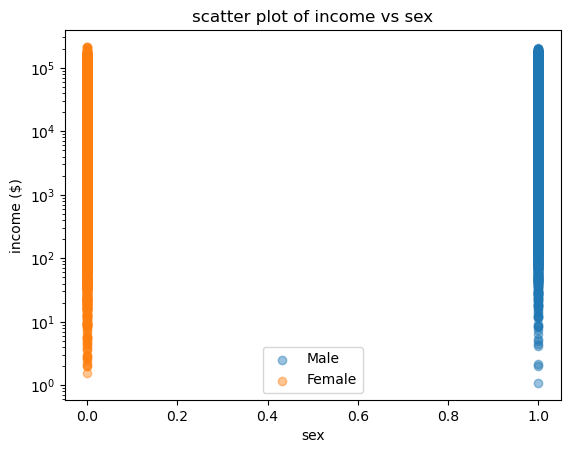

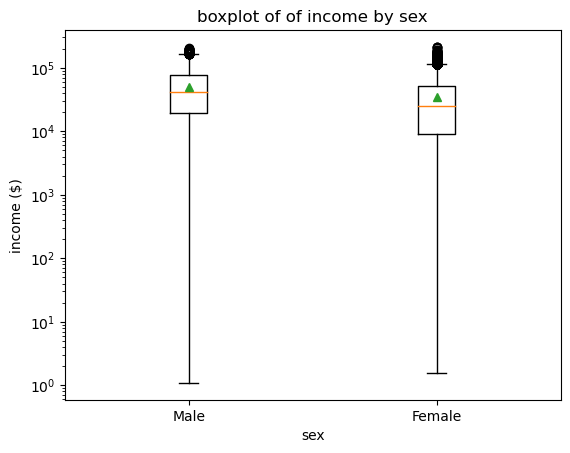

In [50]:
# Plot 1
plt.scatter(df['sex'][(df['sex'] == 1)], male_income, alpha=0.45, label='Male')
plt.scatter(df['sex'][(df['sex'] == 0)], female_income, alpha=0.45, label='Female')
plt.xlabel('sex')
plt.ylabel('income ($)')
plt.yscale('log')
plt.title('scatter plot of income vs sex')
plt.legend()
plt.show()

# Plot 2
plt.boxplot([male_income, female_income], labels=['Male','Female'], showmeans=True)
plt.yscale('log')
plt.xlabel('sex')
plt.ylabel('income ($)')
plt.title('boxplot of of income by sex')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.2</b></div>

Is there a relationship between income and the "occupation" variable? 

_Points:_ 3

At first glance, there might be a weak positive correlation between (Pearson's coefficient = 0.134), where it suggests that income increases in higher occupation # classifiers. However this is misleading, since occupation is not continuous nor an ordinal variable. Boxplots reflect this non-relationship by the varying statistical metrics across all occupation categories (e.g mean, median, IQR, outliers)

In [51]:
df[['income','occupation']].corr()

,income,occupation
income,1.000,0.134
occupation,0.134,1.000


In [52]:
income_by_occ = []
for i in range(12):
    income_by_occ.append(df['income'][df['occupation']==i])

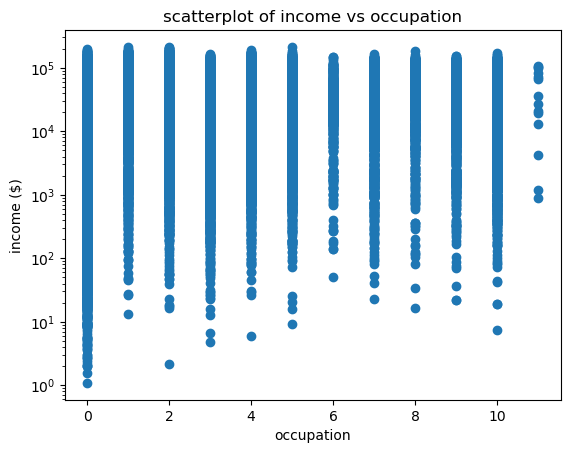

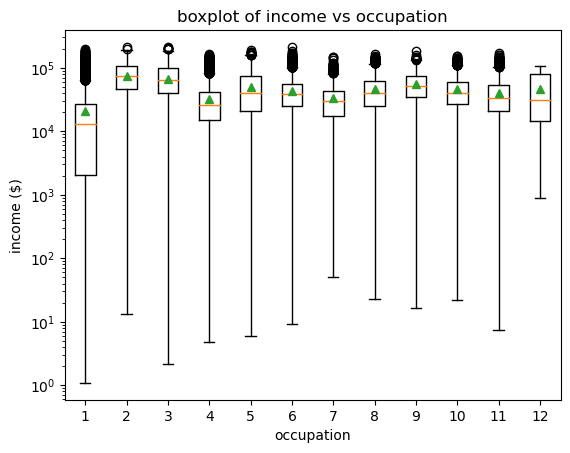

In [53]:
plt.scatter(df['occupation'], df['income'])
plt.xlabel('occupation')
plt.ylabel('income ($)')
plt.yscale('log')
plt.title('scatterplot of income vs occupation')
plt.show()

plt.boxplot(income_by_occ, showmeans=True)
plt.xlabel('occupation')
plt.ylabel('income ($)')
plt.yscale('log')
plt.title('boxplot of income vs occupation')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.3</b></div>

Let's investigate a few questions about education and income:
- Is there a relationship between income and education level? 

- Is this trend similar across both genders in the dataset? 

- Is it possible to consider education level as an ordinal variable? For instance, consider whether retaining this ordering as in the dataset might be preferable to education level complexion as a categorical variable lacking order. 

_Points:_ 4

In [54]:
income_by_edu = []
for i in range(7):
    income_by_edu.append(df['income'][df['education']==i])

In [55]:
df[['income','education']].corr()

,income,education
income,1.000,0.443
education,0.443,1.000


Disregarding the fact that education is a categorical variable, there seem to be a positive relationship observed, where higher education level leads to higher income (Pearson correlation = 0.443). Visualizing education and income by gender shows an income disparity at all levels of education. However, the trend of higher income in higher education level is true for both genders. Considering that the numerical order of 'education' is logically in an increasing level of degrees, it could be classified as an ordinal variable, with 0 and 6 being the lowest and highest levels of education attained. 

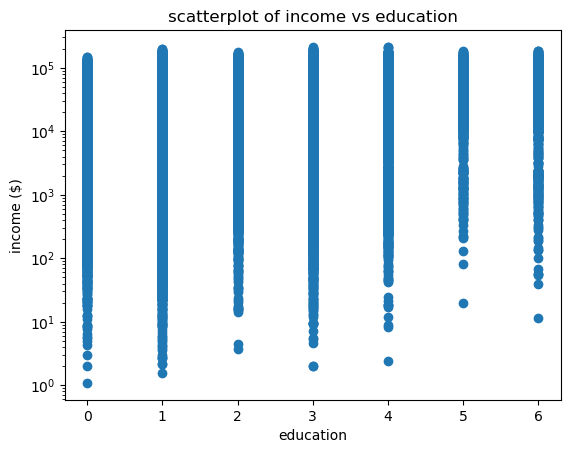

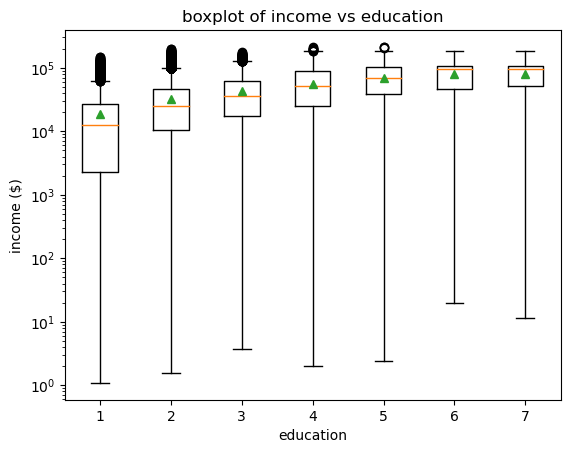

In [56]:
plt.scatter(df['education'], df['income'])
plt.xlabel('education')
plt.ylabel('income ($)')
plt.yscale('log')
plt.title('scatterplot of income vs education')
plt.show()

plt.boxplot(income_by_edu, showmeans=True)
plt.xlabel('education')
plt.ylabel('income ($)')
plt.yscale('log')
plt.title('boxplot of income vs education')
plt.show()

In [57]:
income_by_edu_male = []
income_by_edu_female = []

df_male = df[df['sex']==1]
df_female = df[df['sex']==0]

for i in range(6):
    income_by_edu_male.append(df_male['income'][df['education']==i])
    income_by_edu_female.append(df_female['income'][df['education']==i])

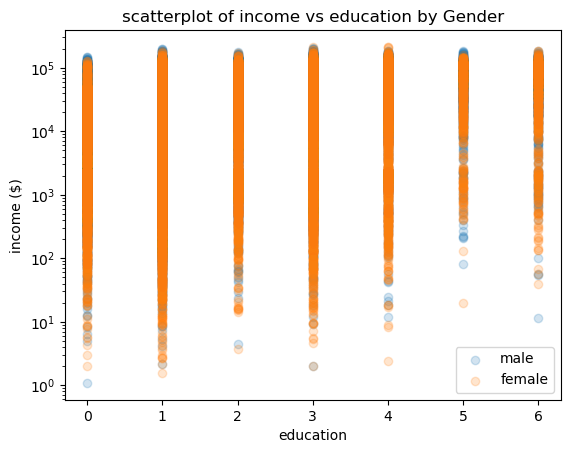

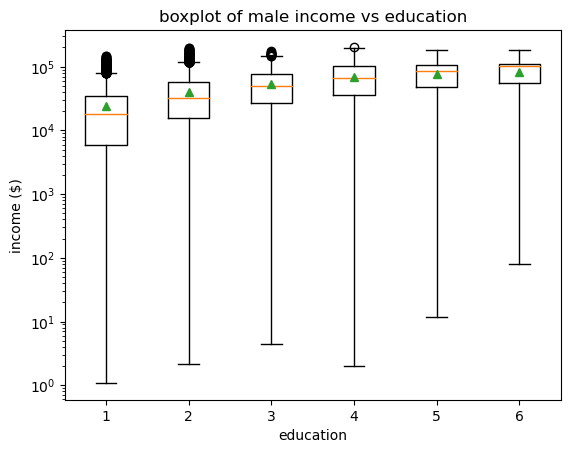

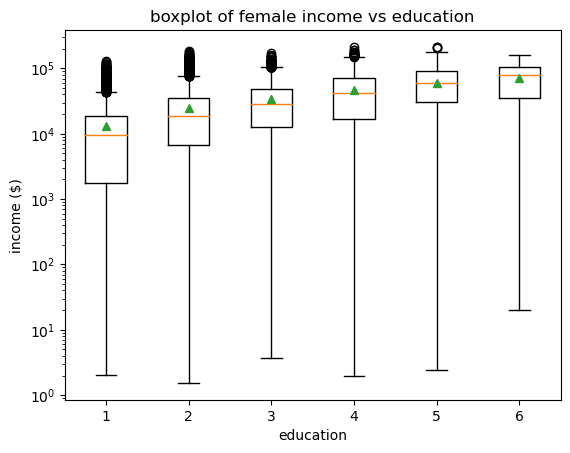

In [58]:
plt.scatter(df_male['education'], df_male['income'], alpha=0.2, label='male')
plt.scatter(df_female['education'], df_female['income'], alpha=0.2, label='female')
plt.xlabel('education')
plt.ylabel('income ($)')
plt.yscale('log')
plt.title('scatterplot of income vs education by Gender')
plt.legend()
plt.show()

plt.boxplot(income_by_edu_male, showmeans=True)
plt.xlabel('education')
plt.ylabel('income ($)')
plt.yscale('log')
plt.title('boxplot of male income vs education')
plt.show()

plt.boxplot(income_by_edu_female, showmeans=True)
plt.xlabel('education')
plt.ylabel('income ($)')
plt.yscale('log')
plt.title('boxplot of female income vs education')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.4</b></div>

Is there a discernable trend in the incomes of participants from different industries?

_Points:_ 3

Despite a positive correlation score of 0.367, there seem to be no discernable trend in the incomes of partifcipants from different industries. The categories of industries has no ordinality reflected in it's numbering scheme, unlike education.

In [59]:
df[['industry','income']].corr()

,industry,income
industry,1.000,0.367
income,0.367,1.000


In [60]:
income_by_ind = []
for i in range(15):
    income_by_ind.append(df['income'][df['industry']==i])
    print(f'industry = {i} has', (df[df['industry']==i]).shape)

industry = 0 has (44315, 16)
industry = 1 has (1414, 16)
industry = 2 has (505, 16)
industry = 3 has (5917, 16)
industry = 4 has (7297, 16)
industry = 5 has (9819, 16)
industry = 6 has (4577, 16)
industry = 7 has (1316, 16)
industry = 8 has (5207, 16)
industry = 9 has (9283, 16)
industry = 10 has (18152, 16)
industry = 11 has (6273, 16)
industry = 12 has (3610, 16)
industry = 13 has (4146, 16)
industry = 14 has (14, 16)


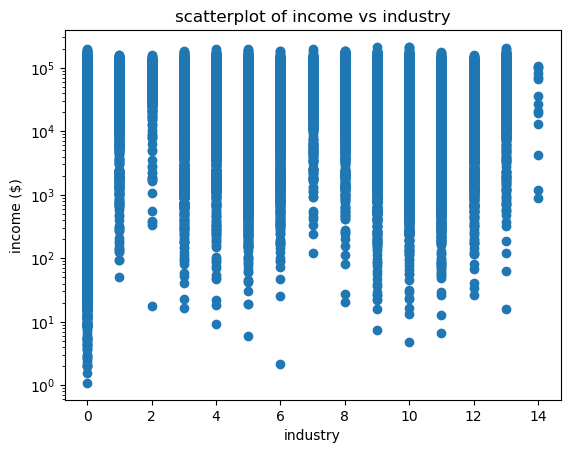

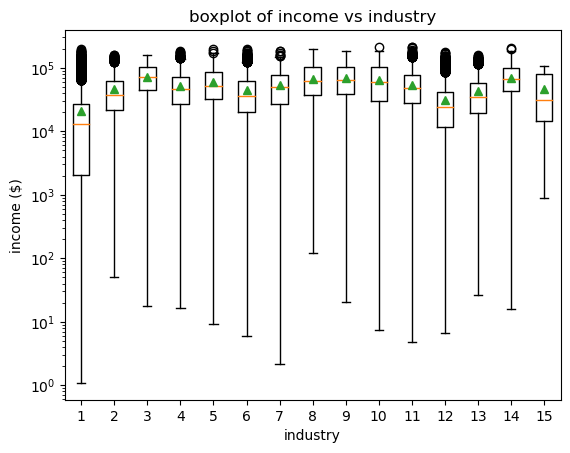

In [61]:
plt.scatter(df['industry'], df['income'])
plt.xlabel('industry')
plt.ylabel('income ($)')
plt.yscale('log')
plt.title('scatterplot of income vs industry')
plt.show()

plt.boxplot(income_by_ind, showmeans=True)
plt.xlabel('industry')
plt.ylabel('income ($)')
plt.yscale('log')
plt.title('boxplot of income vs industry')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.5</b></div>

Is there a clear trend between age and income?

_Points:_ 3

No, there is no clear trend between age and income. There seems to be no correlation at all (r = 0.056). Additionally, there is a gap between age 80-90 without income. Perhaps there would be a clear trend if other variables were held constant (e.g industry, weekly hours, marital_status)

In [62]:
df[['income', 'age']].corr()

,income,age
income,1.000,0.056
age,0.056,1.000


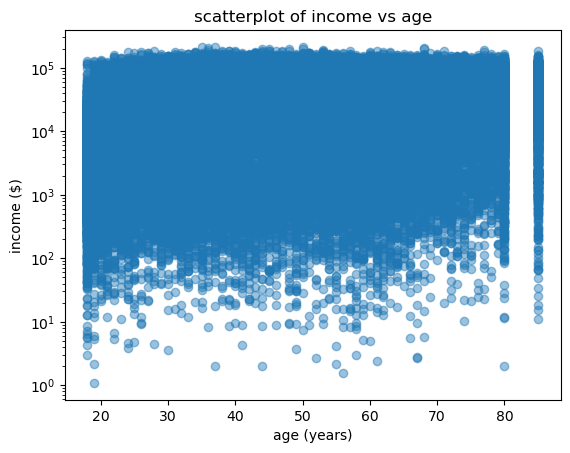

In [63]:
plt.scatter(df['age'], df['income'], alpha=0.45)
plt.xlabel('age (years)')
plt.ylabel('income ($)')
plt.yscale('log')
plt.title('scatterplot of income vs age')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.6</b></div>

Do any of the quantitative attributes show a clear relationship with income? If so, are these relationships linear or non-linear?

_Points:_ 3

Age, weeks_worked, hours_per_week, and hourly_pay are quantitative attributes in the dataset. From these four, weeks_worked, hours_per_week worked have the highest correlation scores to income (~0.56), but no clear linear relationships were observed from the pairplots. It is noted that both these predictors are highly correlated with each other (R=0.861). Hourly_pay seems to hint at a positive linear relationship, but with low correlation coefficient of 0.05.

In [64]:
sns.pairplot(df[['income','age','weeks_worked','hours_per_week','hourly_pay']], x_vars=['income'])

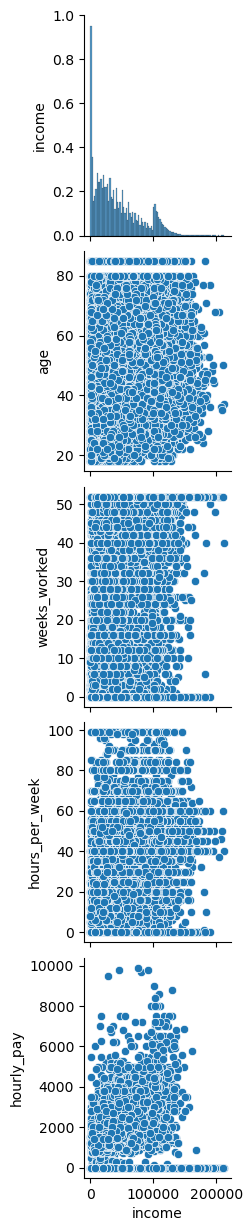

In [65]:
plt.show()

In [66]:
df.corr()

,Unnamed: 0,age,weeks_worked,hours_per_week,hourly_pay,student_status,education,marital_status,sex,military_service,race,industry,occupation,is_paid_by_hour,person_record,income
Unnamed: 0,1.000,-0.037,-0.018,-0.017,-3.059e-03,1.464e-02,-0.059,0.004,0.006,0.003,1.202e-01,-0.011,0.005,-0.018,2.352e-02,-0.046
age,-0.037,1.000,-0.314,-0.323,-5.849e-02,-3.318e-01,0.044,-0.422,-0.029,0.207,-5.175e-02,-0.315,-0.266,-0.106,-5.659e-02,0.056
weeks_worked,-0.018,-0.314,1.000,0.861,1.421e-01,-6.431e-02,0.210,-0.030,0.125,-0.080,-1.342e-02,0.694,0.511,0.282,5.169e-02,0.561
hours_per_week,-0.017,-0.323,0.861,1.000,1.198e-01,-7.749e-02,0.196,-0.019,0.172,-0.074,-5.744e-03,0.640,0.501,0.254,5.605e-02,0.560
hourly_pay,-0.003,-0.058,0.142,0.120,1.000e+00,2.053e-04,-0.006,0.020,0.012,-0.009,-9.893e-03,0.124,0.136,0.303,-1.426e-02,0.059
student_status,0.015,-0.332,-0.064,-0.077,2.053e-04,1.000e+00,-0.081,0.271,-0.025,-0.045,3.490e-02,-0.005,-0.033,-0.016,-1.884e-02,-0.148
education,-0.059,0.044,0.210,0.196,-5.909e-03,-8.075e-02,1.000,-0.175,-0.026,0.020,2.782e-02,0.244,-0.142,0.121,1.443e-02,0.443
marital_status,0.004,-0.422,-0.030,-0.019,1.965e-02,2.709e-01,-0.175,1.000,0.015,-0.095,6.594e-02,0.038,0.083,-0.016,-3.266e-02,-0.221
sex,0.006,-0.029,0.125,0.172,1.197e-02,-2.461e-02,-0.026,0.015,1.000,0.227,-7.871e-03,-0.024,0.210,0.028,5.931e-02,0.215
military_service,0.003,0.207,-0.080,-0.074,-9.384e-03,-4.450e-02,0.020,-0.095,0.227,1.000,-2.790e-02,-0.082,-0.046,-0.021,-1.939e-02,0.075


Looking closely at hourly_pay, apparently, the dataframe includes salaried employees (hourly pay = -1), and hourly employees receiving zero dollars an houe, which might weaken the correlation score. Re-running pairplots and df.corr() on a dataframe filtered for is_paid_by_hour == 1 improved the relationship between hourly_pay and income to 0.316, but at the cost of weekls_worked. 

In [67]:
df_hrly_only = df[df['is_paid_by_hour'] == 1]
# df_hrly_only.head()

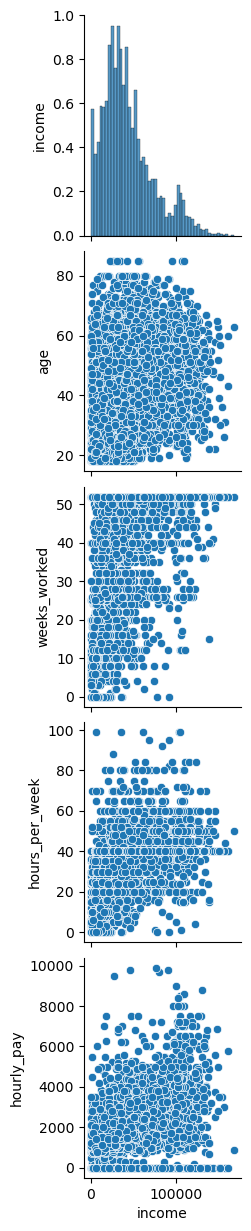

In [68]:
sns.pairplot(df_hrly_only[['income','age','weeks_worked','hours_per_week','hourly_pay']], x_vars=['income'])
plt.show()

In [69]:
df_hrly_only.corr()

,Unnamed: 0,age,weeks_worked,hours_per_week,hourly_pay,student_status,education,marital_status,sex,military_service,race,industry,occupation,is_paid_by_hour,person_record,income
Unnamed: 0,1.000e+00,-0.012,-2.958e-05,0.006,-0.009,-0.005,-0.051,-0.003,0.014,-0.002,0.119,0.012,-0.014,NaN,NaN,-0.012
age,-1.158e-02,1.000,1.763e-01,0.131,0.152,-0.304,0.082,-0.473,-0.035,0.126,-0.037,-0.005,0.001,NaN,NaN,0.292
weeks_worked,-2.958e-05,0.176,1.000e+00,0.480,0.089,-0.111,0.070,-0.156,0.046,0.040,-0.025,-0.042,-0.013,NaN,NaN,0.370
hours_per_week,6.277e-03,0.131,4.803e-01,1.000,0.120,-0.203,0.047,-0.144,0.173,0.061,-0.019,-0.128,0.072,NaN,NaN,0.432
hourly_pay,-8.687e-03,0.152,8.947e-02,0.120,1.000,-0.068,0.226,-0.103,0.054,0.038,-0.057,0.023,-0.088,NaN,NaN,0.316
student_status,-5.334e-03,-0.304,-1.108e-01,-0.203,-0.068,1.000,-0.045,0.222,-0.048,-0.027,0.027,0.080,-0.075,NaN,NaN,-0.159
education,-5.109e-02,0.082,7.021e-02,0.047,0.226,-0.045,1.000,-0.132,-0.114,0.033,0.041,0.204,-0.308,NaN,NaN,0.322
marital_status,-2.517e-03,-0.473,-1.560e-01,-0.144,-0.103,0.222,-0.132,1.000,0.010,-0.082,0.075,0.028,0.010,NaN,NaN,-0.292
sex,1.432e-02,-0.035,4.625e-02,0.173,0.054,-0.048,-0.114,0.010,1.000,0.155,-0.021,-0.283,0.325,NaN,NaN,0.165
military_service,-2.027e-03,0.126,3.984e-02,0.061,0.038,-0.027,0.033,-0.082,0.155,1.000,-0.022,0.009,0.031,NaN,NaN,0.142


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.7</b></div>

What is the relationship between income and the different values for `marital_status` in the dataset?

_Points:_ 3

In order of descending average income - married people are the highest earners, followed by divorced, separated, widowed, and never married participants. df.corr plots show a negative correlation, suggesting that married participants earn more than other non-married groups.

In [70]:
df[['marital_status','income']].corr()

,marital_status,income
marital_status,1.000,-0.221
income,-0.221,1.000


In [71]:
income_by_mar = []
for i in range(5):
    income_by_mar.append(df['income'][df['marital_status']==i])
    print(income_by_mar[i].mean())
    print(f'marital status = {i} has', (df[df['marital_status']==i]).shape)

49079.23236282462
marital status = 0 has (66285, 16)
31144.06873183635
marital status = 1 has (7166, 16)
42273.70445741672
marital status = 2 has (12586, 16)
33627.26053729136
marital status = 3 has (2171, 16)
30242.548824057834
marital status = 4 has (33637, 16)


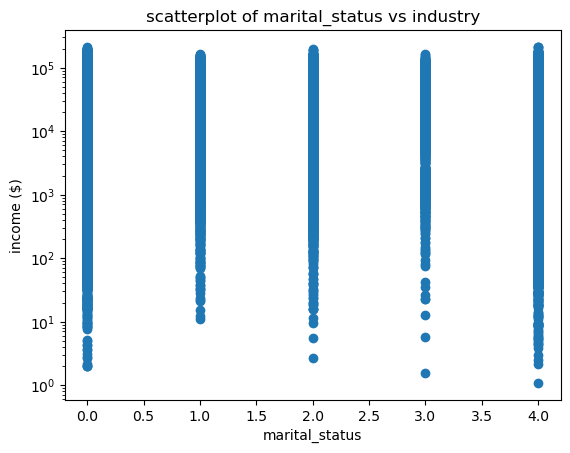

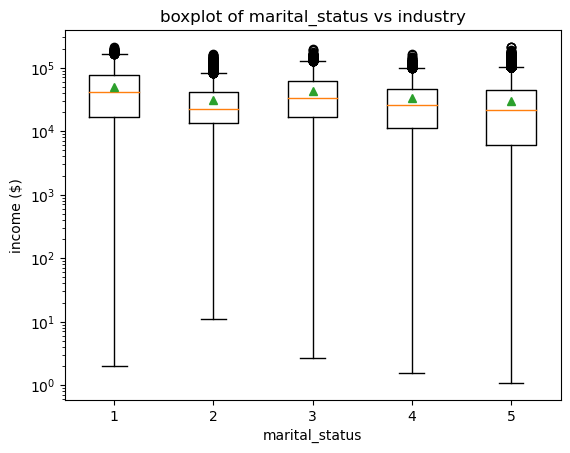

In [72]:
plt.scatter(df['marital_status'], df['income'])
plt.xlabel('marital_status')
plt.ylabel('income ($)')
plt.yscale('log')
plt.title('scatterplot of marital_status vs industry')
plt.show()

plt.boxplot(income_by_mar, showmeans=True)
plt.xlabel('marital_status')
plt.ylabel('income ($)')
plt.yscale('log')
plt.title('boxplot of marital_status vs industry')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.8</b></div>

What is the average effect of the `military_service` variable on income?

_Points:_ 3

participants with and without military service have average incomes of 51771 and 41117, respectively. Thus, military service has an effect of increasing average income by ~$10000 (10654.22 dollars, to be exact)

In [73]:
income_by_mil = []
for i in range(2):
    income_by_mil.append(df['income'][df['military_service']==i])
    print(income_by_mil[i].describe())
    print(f'military_service = {i} has', (df[df['military_service']==i]).shape)

count    113511.000
mean      41117.266
std       35742.356
min           1.090
25%       12012.550
50%       31360.820
75%       61636.260
max      212965.037
Name: income, dtype: float64
military_service = 0 has (113511, 16)
count      8334.000
mean      51771.481
std       36005.416
min           2.140
25%       22524.052
50%       43564.290
75%       76975.325
max      194034.960
Name: income, dtype: float64
military_service = 1 has (8334, 16)


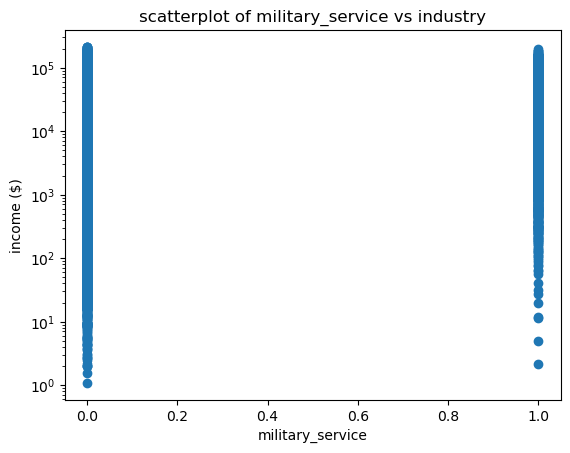

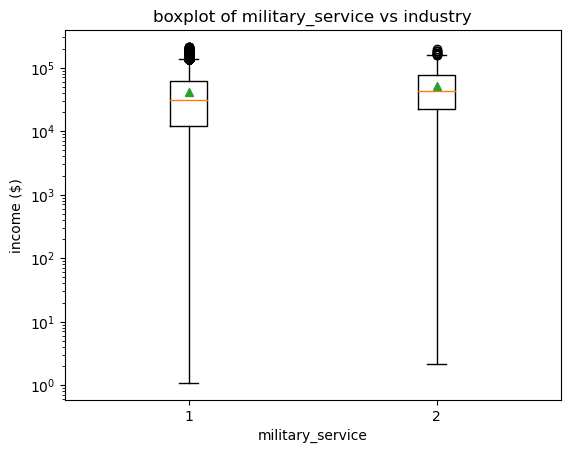

In [74]:
plt.scatter(df['military_service'], df['income'])
plt.xlabel('military_service')
plt.ylabel('income ($)')
plt.yscale('log')
plt.title('scatterplot of military_service vs industry')
plt.show()

plt.boxplot(income_by_mil, showmeans=True)
plt.xlabel('military_service')
plt.ylabel('income ($)')
plt.yscale('log')
plt.title('boxplot of military_service vs industry')
plt.show()

<!-- END QUESTION -->

<a id="part5questions"></a>

## <div class='exercise'><b>Question 5:  Calculate the Gini coefficient [10 pts]</b></div>

[Return to contents](#contents)


**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, you can [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

<div class='exercise'><b>Q5.1</b></div>

Based on the above formula, calculate and report the Gini coefficient for the income of those people in the the provided ASEC dataset. Store the result in `gini_coef`.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 5.1.

_Points:_ 7

In [75]:
df.sort_values(by=['income'], inplace=True)
df['income'].tail()

4358     203847.163
5576     208416.774
10630    209506.924
61804    210424.111
146      212965.037
Name: income, dtype: float64

In [76]:
n = len(df['income'])

In [77]:
numer = 0
denom = 0
for i, x in enumerate(df['income']):
    numer = numer + (2*(i+1) - n - 1)*x
    denom = denom + x

gini_coef = numer/(n*denom)

In [78]:
# Print resulting Gini coefficient
print(
    f"The Gini Index for this dataset is {gini_coef:.3f}")

The Gini Index for this dataset is 0.473


In [79]:
grader.check("q5.1")

q5.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.2</b></div>

According to the [World Bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is the Slovak Republic, ranked 162nd at $0.232$. The United States is ranked 46th on the list and has a Gini index of $0.415$.

- How well does your calculated Gini coefficient for this simulated dataset match the world bank estimate?

- Might the self-report nature of the data, preprocessing steps, or simulation (i.e., sampling) procedure have affected your results? If so, how?

**Note:** The World Bank estimate website uses a [0,100] range for the Gini Index. Above we have converted this to a [0,1] range.

_Points:_ 3

The simulated Gini coefficient is 0.473, slightly higher than the world bank estimate. There is more inequality in the simulated data.

I noticed in EDA that there are outliers in the income data, where they earn vastly more than the majority of the dataset. These outliers in turn increases inequality, and leads to higher Gini scores. Removing them might bring down the Gini coefficient closer to the world bank estimate

There are perhaps other source of income not collected in the dataset (e.g. investments, undeclared assets, trust funds) that should be accounted for on top of income. It might be interested to use total asset (income + other assets) as a response variable.

Confidence in the reported Gini number can be improved by multiple re-sampling, and taking the average Gini of all iterations. Sampling can also be improved by prioritizing equal representation of all available variables (e.g industry, education, occupation).

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<a id="part6questions"></a>

## <div class='exercise'><b>Question 6:  Critiquing the simulated data [5 pts]</b></div>

[Return to contents](#contents)

Take a look at both the [data dictionary for the original dataset](https://www2.census.gov/programs-surveys/cps/datasets/2021/march/asec2021_ddl_pub_full.pdf) and the notebook used to create the simplified simulation, `data/preprocessing.ipynb`. 

What might you have done differently were you to write your own preprocessing code?
A nonexhaustive list of a few things to consider would be:
- Are there important features you think should have been included that were not? 
- Do you agree with the methods used to reduce the number of unique categorical values?
- Might there be a better way to simulate a continuous response from the discrete income brackets in the original data?

**Note:** We used the record type 'person' data from the ASEC rather than 'household' or 'family.' All three record types are represented in the data dictionary.

_Points:_ 5

I noticed outlierrs in the income column, which was not investigated whether to remove or not during pre-processing.

If available, I would include 'race', 'student status', 'zip code', and, 'number of jobs held' - these would be interesting predictors for income.

If included, 'student_status' could be sorted 'from nor currently studying':0, 'part time':1, and then 'full time':2 to simulate a continous response.

I agree with classification categories of 'marital_status'; single individuals who are widowed or divorced (paying alimony) could be at disanvantage over never married individuals. 

I also observed ordinal variable 'education' that is ordered to simulate a continuous response - in increasing level of education attained.

I would add extra information and perhaps another category for participants employed by the hour, but receive 0 payment. Categories for this variable would be 'salaried':2,'hourly':1,and 'unpaid':0. This would allow better plotting for relationship between hourly_rate and income.

Alternatively, instead of labeling salaried workers by -1, hourly pay for salaried workers (not paid by the hour) can be derived from hours per week and weeks_worked.

Lastly, people might identify to more than 2 sexes. Adding the option for other sexes/genders could allow further analysis into these groups.

<!-- END QUESTION -->

**This concludes HW2. Thank you!**

[Return to contents](#contents)